# Problem Statement –
Design and implement a CNN for Image Classification a) Select a suitable image classification
dataset (medical imaging, agricultural, etc.). b) Optimized with different hyper-parameters
including learning rate, filter size, no. of layers, optimizers, dropouts, etc.

In [1]:
# Name : Rhutuja Vishwanath Patil
# Batch : B
# Roll No.: 2447029 

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
def show_dataset_grid(x, y, class_names, rows=5, cols=10):
    plt.figure(figsize=(2 * cols, 2 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        img = x[i]
        if img.max() <= 1.0:
            img = (img * 255).astype("uint8")  # convert back if normalized
        plt.imshow(img)
        plt.title(class_names[int(y[i])], fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

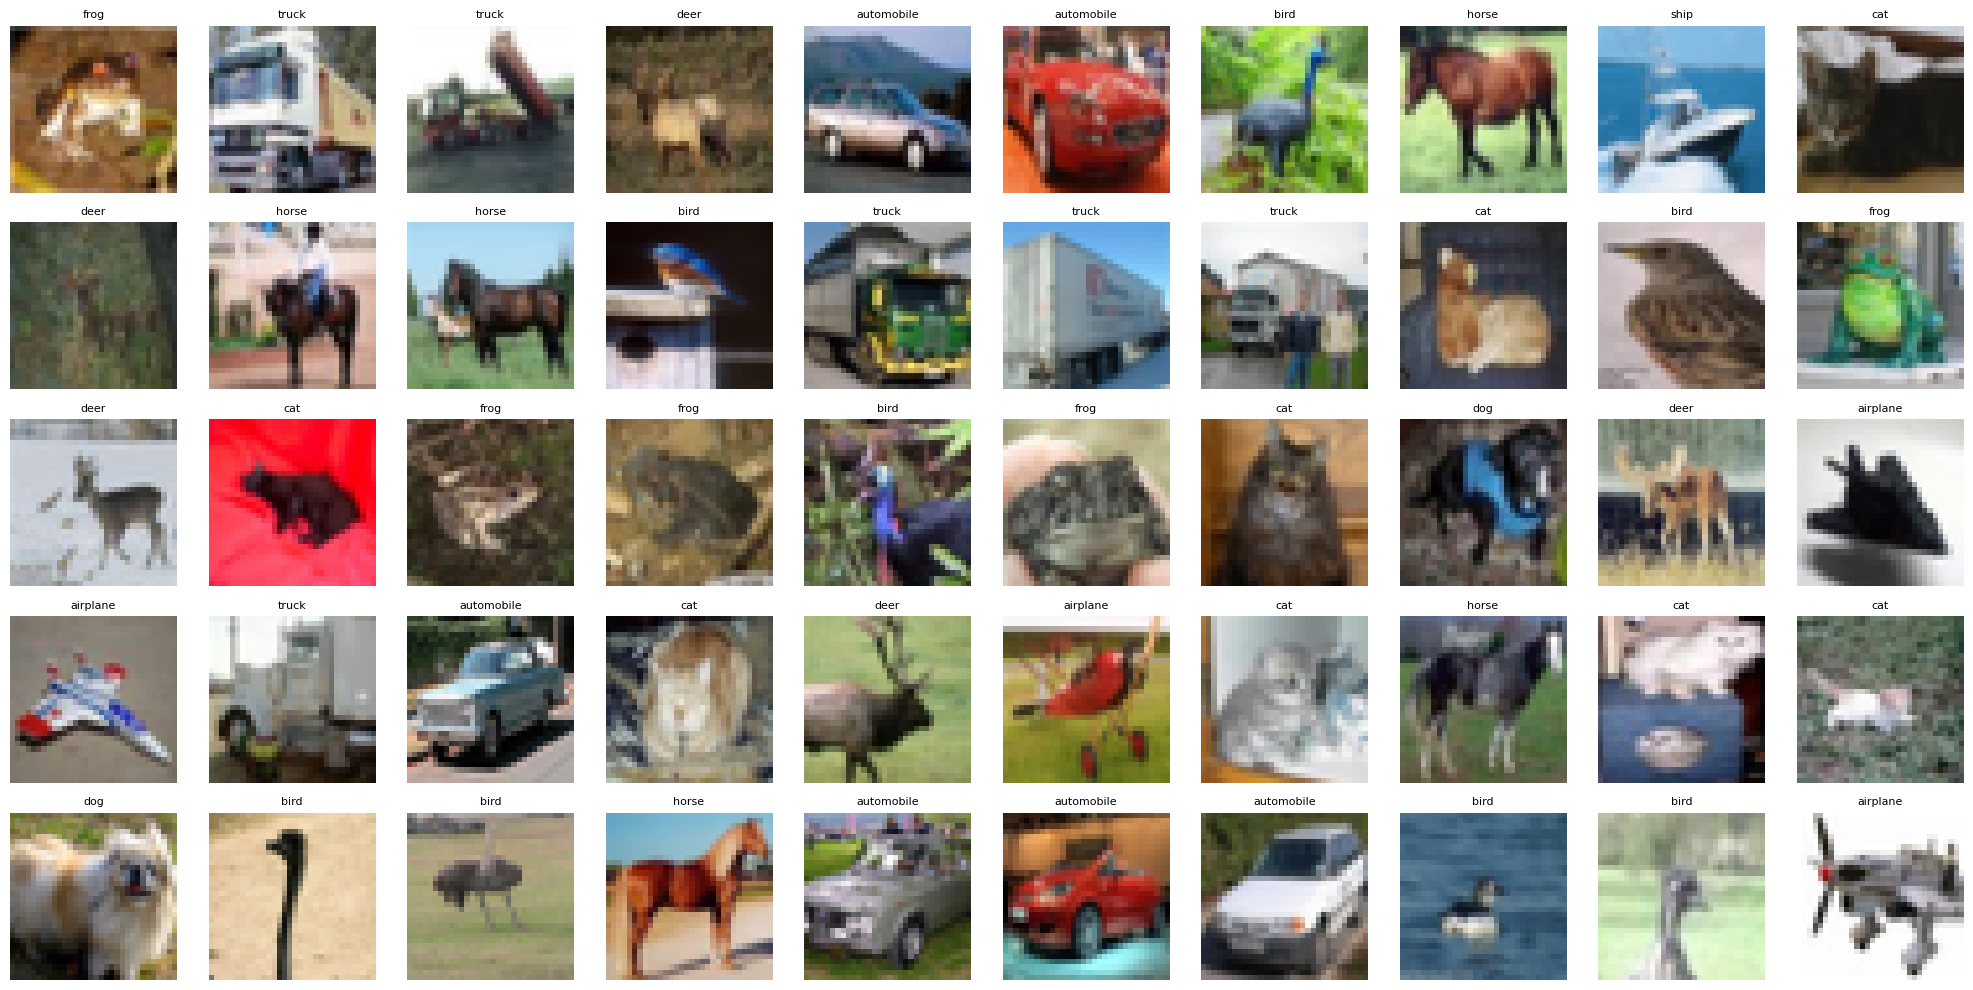

In [6]:
y_train_flat = y_train.flatten()
show_dataset_grid(x_train, y_train_flat, class_names, rows=5, cols=10)

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [8]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [9]:
def build_cnn(optimizer='adam', dropout_rate=0.4, num_filters=64, filter_size=(3, 3)):
    model = Sequential([
        Conv2D(num_filters, filter_size, activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(num_filters * 2, filter_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    opt = Adam(learning_rate=0.001) if optimizer == 'adam' else RMSprop(learning_rate=0.0005)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = build_cnn(optimizer='adam', dropout_rate=0.4, num_filters=64, filter_size=(3,3))

history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

C:\Users\rhutu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 89s 120ms/step - accuracy: 0.2838 - loss: 2.0627 - val_accuracy: 0.4732 - val_loss: 1.4652
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.4417 - loss: 1.5389 - val_accuracy: 0.5406 - val_loss: 1.3770
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.5213 - loss: 1.3351 - val_accuracy: 0.6176 - val_loss: 1.0852
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 131ms/step - accuracy: 0.5668 - loss: 1.2159 - val_accuracy: 0.6008 - val_loss: 1.1377
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 89s 126ms/step - accuracy: 0.5955 - loss: 1.1375 - val_accuracy: 0.6010 - val_loss: 1.0817
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 94s 133ms/step - accuracy: 0.6248 - loss: 1.0736 - val_accuracy: 0.6678 - val_loss: 0.9938
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 102s 144ms/step - accuracy: 0.6463 - loss: 1.0057 - val_accuracy: 0.5996 - val_loss: 1.1331
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.6577 - loss:

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6857 - loss: 0.9323

Test Accuracy: 0.6845
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


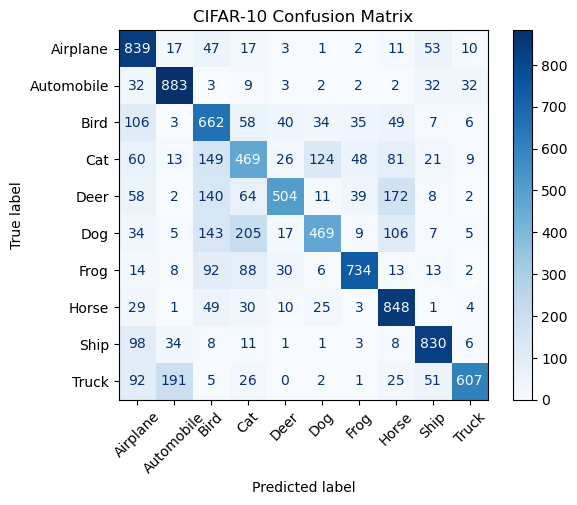

In [12]:
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[
    'Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']))



Classification Report:
              precision    recall  f1-score   support

    Airplane       0.62      0.84      0.71      1000
  Automobile       0.76      0.88      0.82      1000
        Bird       0.51      0.66      0.58      1000
         Cat       0.48      0.47      0.47      1000
        Deer       0.79      0.50      0.62      1000
         Dog       0.69      0.47      0.56      1000
        Frog       0.84      0.73      0.78      1000
       Horse       0.64      0.85      0.73      1000
        Ship       0.81      0.83      0.82      1000
       Truck       0.89      0.61      0.72      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



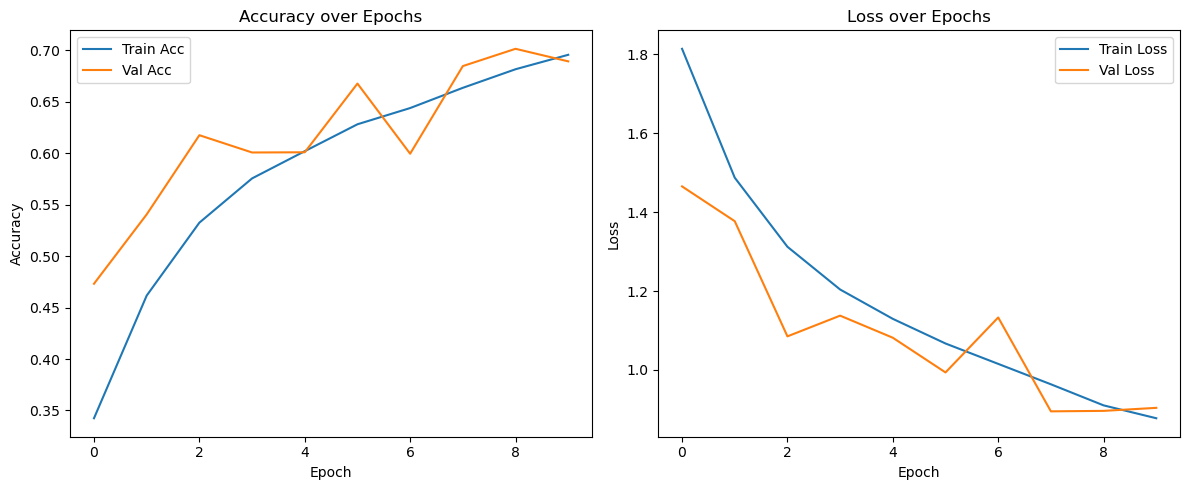

In [14]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()